Proyecto 2. Introducción al análisis de datos
Elsa Ximena Barba Flores

In [1]:
# Comenzamos importando la librería Pandas para análisis de datos y Seaborn para graficar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Como una buena práctica se define una variable con el nombre del archivo CSV
synergy_db = "synergy_logistics_database.csv"

In [3]:
# Abrimos el archivo CSV en modo lectura
sldf = pd.read_csv(synergy_db, parse_dates=[5])


Opción 1: Rutas de importación y exportación.

Synergy Logistics quiere saber cuáles son las diez rutas más demandadas. Para resolver esto primero hay que tener en cuénta ¿Qué es lo que consideramos como ruta? Para definir una ruta es necesario tomar en cuenta el origen y el destino (no es lo mismo una ruta de China a Japón que de Japón a China) y el medio de transporte (no es lo mismo ir de México a Estados Unidos por tierra que por mar). Se consideran por separado los productos que son de importación de los de exportación.

In [4]:
# Utilizamos el método "groupby" para delimitar qué columnas de la variable dataframe queremos reacomodar
# El argumento "by" nos permite delimitar cuáles columnas queremos obtener como índices.
rutas = sldf.groupby(by=['direction', 'origin', 'destination', 'transport_mode'])
#rutas.sum()

In [5]:
# Sumamos los valores de la columna "total_value"
suma = rutas.sum()['total_value']
# Agregamos estadísticas descriptivas a la columna "total_value" de la variable "rutas"
rutas = rutas['total_value'].describe()
# Añadimos la columna con la suma total
rutas['suma_total'] = suma
rutas = rutas.reset_index()
#rutas

Ahora disponemos de un dataframe que contiene columnas (índices) que nos indican si se trata de una importación o una exportación, el país de origen, destino, medio de transporte, cantidad de veces que se realizó la ruta y la suma total de los valores generados por cada ruta.

Con estos datos, hacemos el análisis para las diez rutas de exportación y las diez rutas de importación más demandadas

In [6]:
# Creamos dos df separados, uno que contenga solo las importaciones y uno que contenga solamente exportaciones
exportaciones = rutas[rutas['direction'] == 'Exports']
#exportaciones
importaciones = rutas[rutas['direction'] == 'Imports']

In [7]:
# Obtenemos un número entero que sea la suma de todos los valores de exportación
# Y otro que contenga la suma de todos los valores de importación
valor_total_exp = exportaciones.suma_total.sum()
#valor_total_exp
valor_total_imp = importaciones.suma_total.sum()

In [8]:
# Creación de una función con argumentos dataframe y un mensaje
def resultados(df, m):
    total_valor = df.suma_total.sum()
    total_usos = df['count'].sum()
    porcentaje = (total_valor / valor_total_exp)*10000
    porcentaje = int(porcentaje) / 100
    print(f'Las 10 rutas {m} aportan {porcentaje}%, en un total de: {total_usos} servicios')

Mostrando las diez rutas de exportación más demandadas

In [9]:
mas_demandadas_exp = exportaciones.sort_values(by='count', ascending=False).head(10)
mas_demandadas_exp = mas_demandadas_exp.reset_index()
mayor_valor_exp = exportaciones.sort_values(by='suma_total', ascending=False).head(10)
mayor_valor_exp = mayor_valor_exp.reset_index()
#mas_demandadas_exp
#mayor_valor_exp

In [10]:
resultados(mas_demandadas_exp, 'mas demandadas')
resultados(mayor_valor_exp, 'con mayor valor')

Las 10 rutas mas demandadas aportan 28.13%, en un total de: 3305.0 servicios
Las 10 rutas con mayor valor aportan 36.61%, en un total de: 2194.0 servicios


Hacemos el análisis para las diez rutas de importación más demandadas

In [11]:
mas_demandadas_imp = importaciones.sort_values(by='count', ascending=False).head(10)
mas_demandadas_imp = mas_demandadas_imp.reset_index()
mayor_valor_imp = importaciones.sort_values(by='suma_total', ascending=False).head(10)
mayor_valor_imp = mayor_valor_imp.reset_index()
#mas_demandadas_imp
#mayor_valor_imp

In [12]:
resultados(mas_demandadas_imp, 'mas demandadas')
resultados(mayor_valor_imp, 'con mayor valor')

Las 10 rutas mas demandadas aportan 16.32%, en un total de: 1740.0 servicios
Las 10 rutas con mayor valor aportan 18.07%, en un total de: 1524.0 servicios


Opción 2: Medio de transporte utilizado

Synergy Logistics espera que realicemos un análisis que muestre los tres medios de transporte más importantes para las rutas de importación y exportación tomando en cuenta los valores que cada una genera.

A primera instancia podemos pre visualizar cuáles son las rutas más importantes haciendo un gráfico de barras que muestre las insidencias. 

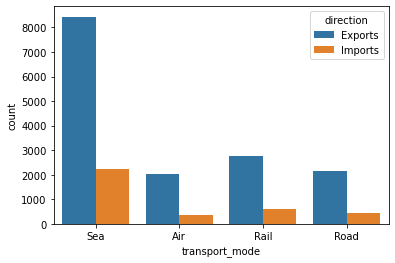

In [13]:
ax = sns.countplot(x='transport_mode', data=sldf, hue="direction")

Del grafico superior es fácil visualizar que, tanto para exportaciones como para importaciones, los medios de transporte más utilizados son por mar, por riel y por carretera.
Ahora sigue hacer un análisis tomando en cuenta los valores de las ganancias, para facilitar la visualización realizamos un análisis anual.

In [21]:
# Obtenemos un dataframe agrupando por año y medio de transporte
transportes_anuales = sldf.groupby(by=['year', 'transport_mode'])
# Creamos una lista en la que tengamos como índices los años y los medios de transporte
#además sumamos los valores obtenidos para cada uno de ellos
valor_anual_transporte = transportes_anuales['total_value'].agg(pd.Series.sum)
#valor_anual_transporte

year  transport_mode
2015  Air                7023000000
      Rail               4437488000
      Road               8231077000
      Sea               11306827000
2016  Air                3459111000
      Rail               5479198000
      Road               4710088000
      Sea               18500041000
2017  Air                9065068000
      Rail               8483234000
      Road               2042000000
      Sea               14838463000
2018  Air                2457374000
      Rail              10632394000
      Road               6502062000
      Sea               17542148000
2019  Air                9037995000
      Rail               4684366000
      Road               8732171000
      Sea               18486953000
2020  Air                7219599000
      Rail               9911363000
      Road               3053088000
      Sea               19856190000
Name: total_value, dtype: int64

In [22]:
# Creamos una nueva variable dataframe
info_transp_anual = pd.DataFrame()
# Guardamos la serie "valor_anual_transporte" en el dataframe
info_transp_anual['valor_total'] = valor_anual_transporte
# Añadimos una columna de frecuencia que cuenta la cantidad de incidencias
info_transp_anual['frecuencia'] = transportes_anuales['total_value'].describe()['count']
#info_transp_anual

valor_total  frecuencia
year transport_mode                         
2015 Air              7023000000       417.0
     Rail             4437488000       542.0
     Road             8231077000       609.0
     Sea             11306827000      1619.0
2016 Air              3459111000       318.0
     Rail             5479198000       507.0
     Road             4710088000       344.0
     Sea             18500041000      2004.0
2017 Air              9065068000       536.0
     Rail             8483234000       660.0
     Road             2042000000       111.0
     Sea             14838463000      1874.0
2018 Air              2457374000       399.0
     Rail            10632394000       749.0
     Road             6502062000       556.0
     Sea             17542148000      1476.0
2019 Air              9037995000       358.0
     Rail             4684366000       341.0
     Road             8732171000       668.0
     Sea             18486953000      1813.0
2020 Air              7219599000       361.0
     Rail             9911363000       582.0
     Road             3053088000       310.0
     Sea             19856190000      1902.0

<AxesSubplot:xlabel='year', ylabel='frecuencia'>

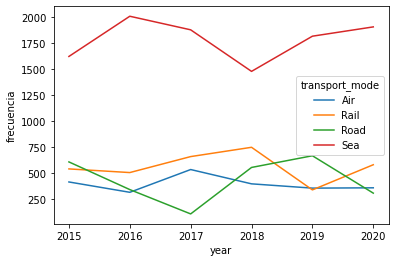

In [25]:
sns.lineplot(x='year', y='frecuencia', hue='transport_mode', data=info_transp_anual)

In [27]:
#sldf['month'] = sldf['date'].dt.month
#transportes_a_m = sldf.groupby(['year', 'month', 'transport_mode'])
#valor_a_m_transporte = transportes_a_m['total_value'].agg(pd.Series.sum)

#info_transp_a_m = pd.DataFrame()
#info_transp_a_m['valor_total'] = valor_a_m_transporte
#info_transp_a_m['frecuencia'] = transportes_a_m['total_value'].describe()['count']
#sns.lineplot(x='ano_mes', y='frecuencia', hue='transport_mode', data=info_transp_a_m)

Opción 3: Valor total de importaciones y exportaciones

In [16]:
#importaciones = sldb[ sldb["direction"] == "Imports"]
#exportaciones = sldb[ sldb["direction"] == "Exports"]  

In [17]:
#prob3 = importaciones.groupby("origin").sum()["total_value"].sort_values(ascending=False)
#prob3